# Statistical Analysis Project

###### Importing libs:

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

#http://jse.amstat.org/v19n3/decock.pdf

###### Opening the file and backing up

In [120]:
train = pd.read_csv('C:/Users/joaos/Desktop/Curso Ironhack/Labs/data-labs/module-2/statistical-analysis-project/your-code/train.csv')


In [121]:
train_bkp = train

###### Exploring Dataset

In [122]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [123]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### ID Data is not usable for this analysis, so lest drop it

In [124]:
train.drop("Id", axis = 1, inplace = True)
train.shape

(1460, 80)

#### Dealing with outliers - According to the author, the column 'GrLivArea' has four outliers, lets see it:

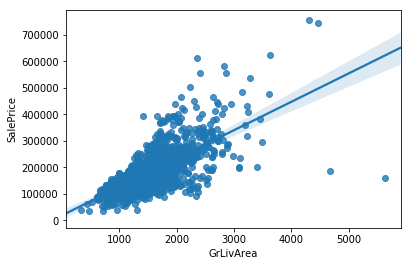

In [125]:
sns.regplot(x=train.GrLivArea, y=train.SalePrice)

In [126]:
train = train[train['GrLivArea'] < 4000]

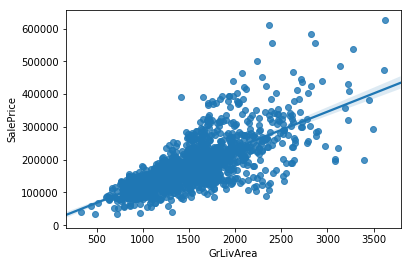

In [127]:
sns.regplot(x=train.GrLivArea, y=train.SalePrice)

In [128]:
train.shape

(1456, 80)

###### Exploratory Data Analysis

In [129]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1197.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1448.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.888736,69.693400,10448.784341,6.088599,5.576236,1971.18544,1984.819368,102.087707,436.991071,46.677198,...,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,180151.233516
std,42.358363,23.054474,9860.763449,1.369669,1.113966,30.20159,20.652143,177.338930,430.255052,161.522376,...,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,76696.592530
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,164.250000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


Finding out the correlation between the model variables:

In [130]:
correl = train.corr()

Text(0.5, 1.0, 'Correlation between variables')

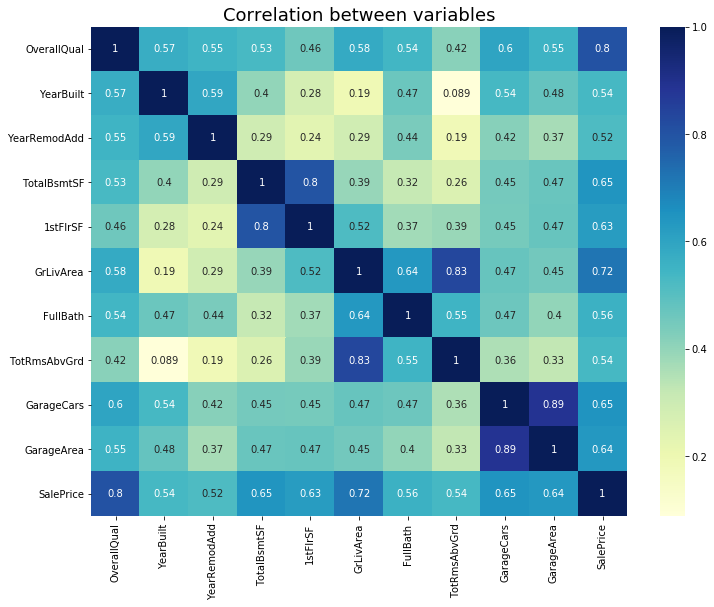

In [72]:
plt.figure(figsize=(12,9))
signif_corr = correl.index[abs(correl["SalePrice"])>0.5]
sns.heatmap(train[signif_corr].corr(),annot=True,cmap="YlGnBu")
plt.title('Correlation between variables', fontsize=18)

Looking up the main variables:

#### Overall Quality:

In [73]:
train['OverallQual'].describe()

count    1456.000000
mean        6.088599
std         1.369669
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

As we can see the mean quality of the houses in this dataset is 6, if we consider we the standart deviation we can assume that 68,37% of the houses have a quality between 4,72 and 7,45; and 95,45% between 3,35 and 8,82. 

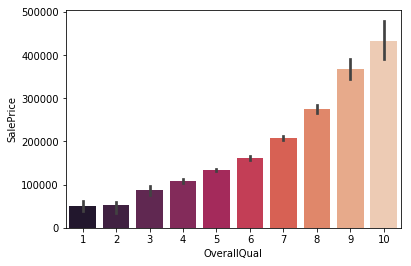

In [131]:
sns.barplot(x=train['OverallQual'], y=train['SalePrice'], palette="rocket")

Overall quality has a exponencial distribution with a great and positive correlation, the bigger the quality from houses, bigger the price 

##### Ground Living Area

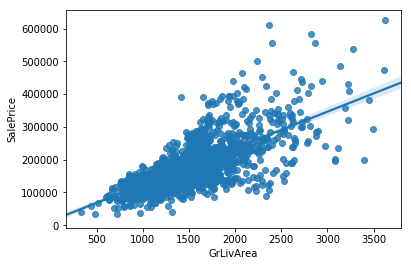

In [132]:
sns.regplot(x=train.GrLivArea, y=train.SalePrice)

In [134]:
train['GrLivArea'].describe()

count    1456.000000
mean     1506.502060
std       496.815378
min       334.000000
25%      1128.000000
50%      1458.500000
75%      1775.250000
max      3627.000000
Name: GrLivArea, dtype: float64

The average ground living area is 1506 square feet, in meters that would be 1506 x 0.092903 = 139,9 square meters.

##### Sale Price:

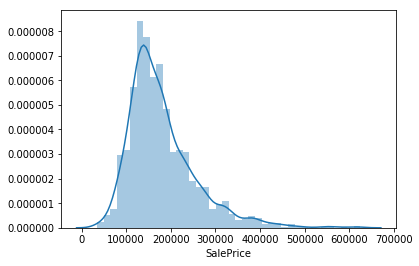

In [135]:
sns.distplot(train.SalePrice)

At first view, SalePrice is skewed, that can be mitigated with some transformation, like log tranformation:

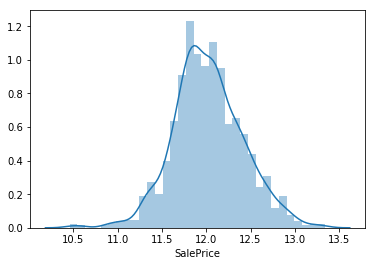

In [136]:
sns.distplot(np.log(train.SalePrice + 1))

In [137]:
train["Log_SalePrice"] = np.log(train["SalePrice"])

C:\Users\joaos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [139]:
train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

So, a house with quality above the average (grade 6), with 486 square meters, would have a average price of USS 180.151,23. In brazilian Reais that would be 749.429,11 reais

#### Correlation between Sale Price and other variables

In [140]:
correl = train.corr()["SalePrice"]

In [141]:
correl[np.argsort(correl, axis=0)[::-1]]

SalePrice        1.000000
Log_SalePrice    0.954609
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePr

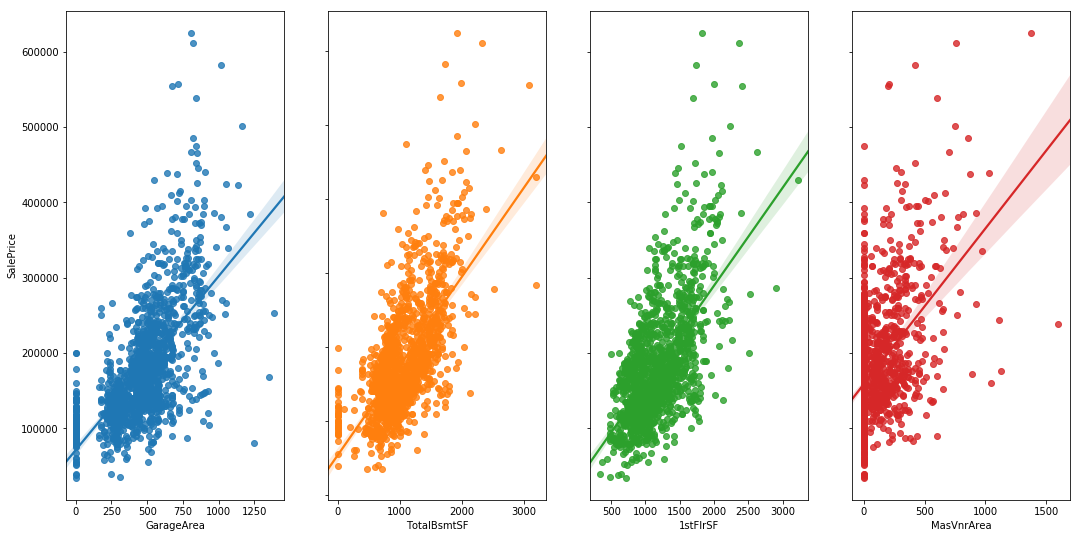

In [142]:
fig, axes  = plt.subplots(1, 4, figsize=(18, 9))
                                #sharex='col', sharey='row')

#axes[0].scatter(x=train.OverallQual, y=train.SalePrice)
#axes[1].scatter(x=train.GrLivArea, y=train.SalePrice)


sns.regplot(x=train.GarageArea, y=train.SalePrice, ax=axes[0])
sns.regplot(x=train.TotalBsmtSF, y=train.SalePrice, ax=axes[1])
sns.regplot(x=train['1stFlrSF'], y=train.SalePrice, ax=axes[2])
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=axes[3])

axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')

axes[1].set_yticklabels('')
axes[2].set_yticklabels('')
axes[3].set_yticklabels('')

#axes[0].set_title('x')
#axes[1].set_title('y')
#axes[1].set_ylabel('')
#axes[1].set_xlim([0, 1000])
#axes[1].set_xticklabels([0, 100, 200])

plt.show()

In [112]:
train['GarageArea'].describe()

count    1456.000000
mean      471.568681
std       211.986421
min         0.000000
25%       329.500000
50%       478.500000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

In [113]:
train['TotalBsmtSF'].describe()

count    1456.000000
mean     1050.658654
std       412.155715
min         0.000000
25%       795.000000
50%       990.500000
75%      1293.750000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

In [114]:
train['1stFlrSF'].describe()

count    1456.000000
mean     1157.108516
std       369.307331
min       334.000000
25%       882.000000
50%      1086.000000
75%      1389.250000
max      3228.000000
Name: 1stFlrSF, dtype: float64

In [115]:
train['MasVnrArea'].describe()

count    1448.000000
mean      102.087707
std       177.338930
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

Considering the main variables and the correlation between them we can conclude that Overall quality is high correlated with Sale Price because it summarize all the other varibles in a grade from 0 to 10. After that, Ground living Area is the second highest correlated once is directly associate to the house size. The same conclusion is possible considering GarageArea, 1stFlrSF and TotalBsmtSF. MasVnrArea has a signficance above 50% and its more related to the quality of the houses.

The next steps for modeling and predict house prices would be dealing with null values, categorical variables and testing the best model for this dataset